In [1]:
from bigraph_viz import plot_bigraph
# from processes.cobra import CobraProcess

In [2]:
from process_bigraph import types as core

In [3]:
help(core)

Help on ProcessTypes in module process_bigraph.type_system object:

class ProcessTypes(bigraph_schema.type_system.TypeSystem)
 |  Method resolution order:
 |      ProcessTypes
 |      bigraph_schema.type_system.TypeSystem
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  dehydrate(self, schema)
 |  
 |  infer_edge(self, schema, wires)
 |  
 |  infer_schema(self, schema, state, top_state=None, path=None)
 |      Given a schema fragment and an existing state with _type keys,
 |      return the full schema required to describe that state,
 |      and whatever state was hydrated (processes/steps) during this process
 |  
 |  initialize_edge_state(self, schema, path, edge)
 |  
 |  lookup_address(self, address)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from bigraph_schema.type_system.TypeSystem:
 |  
 |  access(self, type_ke

In [4]:
fba_schema = {
'fba': {
            '_type': 'process',
            'address': 'local:cobra',
            'config': {
                'model_file': 'cobra_process/models/e_coli_core.xml'
            },
            'inputs': {
                'model': ['model_store'],
                'reaction_bounds': ['reaction_bounds_store'],
            },
            'outputs': {
                'fluxes': ['fluxes_store'],
                'objective_value': ['objective_value_store'],
                'reaction_dual_values': ['reaction_dual_values_store'],
                'metabolite_dual_values': ['metabolite_dual_values_store'],
            }
        },
}

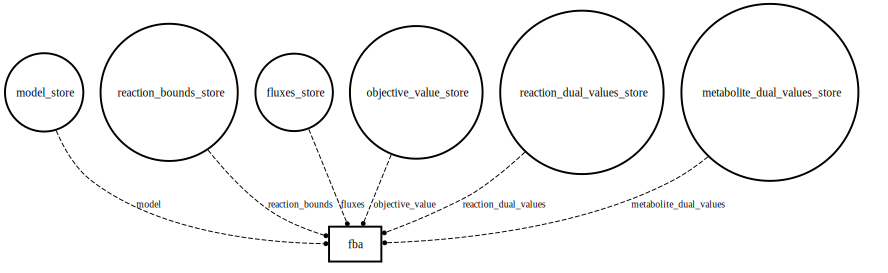

In [6]:
plot_bigraph(fba_schema, show_types=True)

In [ ]:
bmfva_schema = {
    'bayesian_metabolic_control_analysis': {
        '_type': 'process',
        'address': 'local:bayesian_metabolic_flux_variability_analysis',
        'config': {
            'model_file': 'cobra_process/models/e_coli_core.xml',
            'samples': 1000,
            'burn': 100,
            'thin': 10,
            'reaction_bounds': {
                'EX_glc__D_e': (-10, 0),
                'EX_o2_e': (-20, 0),
            },
            'objective': 'BIOMASS_Ecoli_core_w_GAM',
            'objective_direction': 'max',
            'fluxes': {
                'EX_glc__D_e': 10,
                'EX_o2_e': -20,
            },
        },
        'inputs': {
            'model': ['model_store'],
            'reaction_bounds': ['reaction_bounds_store'],
        },
        'outputs': {
            'fluxes': ['fluxes_store'],
            'objective_value': ['objective_value_store'],
            'reaction_dual_values': ['reaction_dual_values_store'],
            'metabolite_dual_values': ['metabolite_dual_values_store'],
        }
    },
}